# Principal Component Analysis (PCA)
## High-Dimensional Data Visualization

### Project Overview
High-dimensional datasets are difficult to visualize and often contain redundant information due to correlated features.
This project applies **Principal Component Analysis (PCA)** to reduce dimensionality while preserving maximum variance,
and visualizes the data in lower-dimensional space.

**Key Objectives:**
- Understand PCA as a dimensionality reduction technique
- Reduce high-dimensional data into fewer components
- Visualize complex datasets in 2D and 3D
- Interpret explained variance and PCA results


## Import Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Load Dataset

We use the **Wine Dataset**, which contains:
- 178 samples
- 13 numerical features
- Multiple correlated variables

This makes it ideal for applying PCA.


In [ ]:
data = load_wine()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Dataset Overview


In [ ]:
df.shape


(178, 13)

In [ ]:
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Why PCA?

- The dataset has **many numerical features**
- Several features are **correlated**
- High dimensionality makes visualization difficult

PCA helps by:
- Reducing dimensionality
- Removing redundancy
- Preserving maximum information (variance)


## Feature Scaling

PCA is **variance-based**, so feature scaling is mandatory.
We apply **StandardScaler** to ensure all features contribute equally.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Apply PCA (2 Components)

I reduce the dataset from **13 dimensions to 2 dimensions**
to enable visualization.


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


## Explained Variance

Explained variance shows how much information each principal component retains.


In [ ]:
pca.explained_variance_ratio_


array([0.36198848, 0.1920749 ])

## Cumulative Explained Variance

This helps decide how many components should be kept.


In [ ]:
np.cumsum(pca.explained_variance_ratio_)


array([0.36198848, 0.55406338])

## Explained Variance Visualization


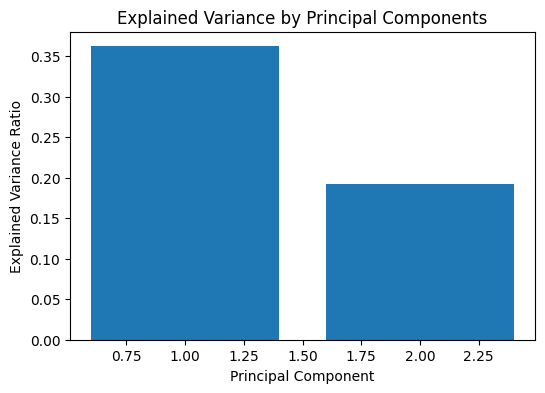

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(1,3), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.show()


## Cumulative Explained Variance Plot

This plot helps identify the optimal number of components.


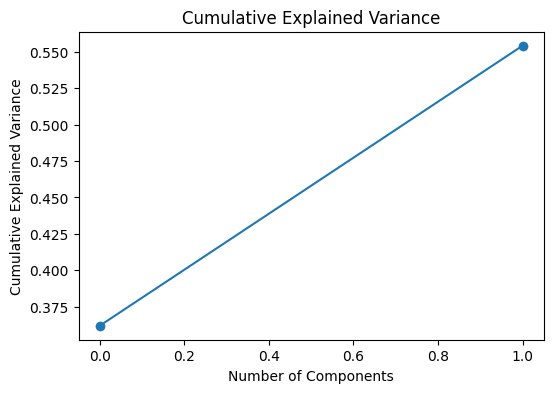

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.show()


### Displaying the saved image

In [ ]:
import os

if not os.path.exists('images'):
    os.makedirs('images')

plt.savefig("images/cumulative_variance.png")

<Figure size 640x480 with 0 Axes>

## 2D PCA Visualization

The following plot visualizes the high-dimensional data in 2D PCA space.


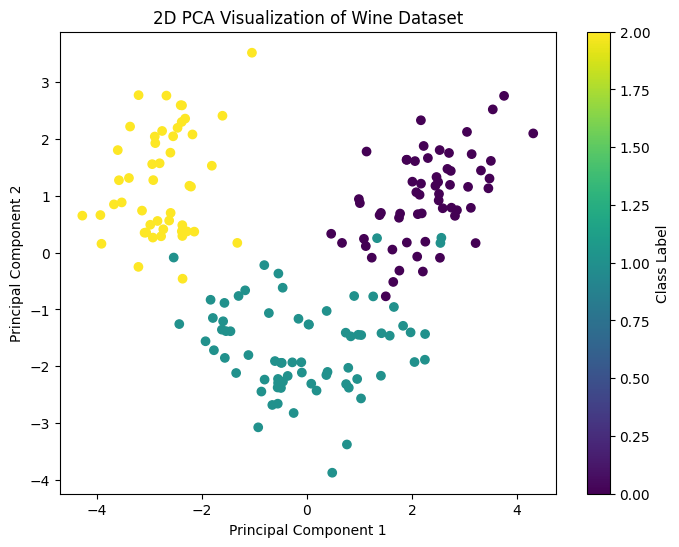

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Wine Dataset")
plt.colorbar(label="Class Label")
plt.show()


In [ ]:
plt.savefig("images/pca_2d.png")


<Figure size 640x480 with 0 Axes>

## 3D PCA Visualization

We apply PCA with 3 components for deeper structure visualization.


In [ ]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)


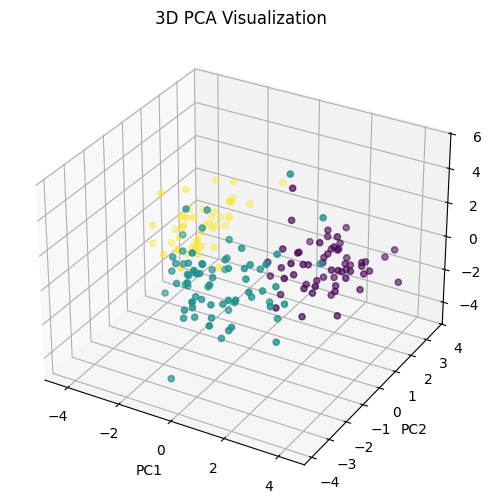

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y, cmap='viridis')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization")
plt.show()


## Interpretation & Insights

- PCA reduced dimensionality from **13 features to 2**
- The first two components capture a significant portion of variance
- Visualization reveals underlying structure in the data
- PCA is effective for visualization but not ideal when interpretability is required


## PCA Limitations

- Loss of feature interpretability
- Assumes linear relationships
- Sensitive to scaling and outliers
- Information loss is unavoidable


## Conclusion

This project demonstrates how PCA can simplify high-dimensional datasets
by reducing dimensions while retaining maximum variance.
PCA is especially useful for visualization and preprocessing,
but should be used carefully when interpretability is important.
